In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 2024龙年春晚刘谦魔术《守岁共此时》揭秘
作者：Chen

日期：2024年2月9日

In [2]:
def visualizeCards(original_cards, cards):
    """
    可视化扑克牌的排序.

    Args:
        original_cards (list): 原始扑克牌列表.
        cards (list): 扑克牌列表.
    """
    # 定义扑克牌颜色
    color_map = {
        original_cards[0]: (55/255, 103/255, 149/255),  
        original_cards[1]: (114/255, 188/255, 213/255),  
        original_cards[2]: (255/255, 208/255, 111/255),  
        original_cards[3]: (231/255, 98/255, 84/255),  
    }


    colors = [color_map[card] for card in cards]
    while len(colors) < 8:
        colors.append("white")

    # 创建一个水平条形图
    plt.figure(figsize=(5, 1))
    plt.bar(range(2*len(original_cards)), [1]*2*len(original_cards), color=colors)
    plt.xticks(range(len(cards)), cards)
    plt.yticks([])
    plt.show()

In [3]:
def magic(original_cards):
    """
    基于特定任务，对扑克牌进行操作，最后剩下一张牌，并返回隐藏的神秘牌和最后剩下的牌.

    Args:
        original_cards (list): 原始卡片列表.

    Returns:
        hidden_card (str): 被隐藏的卡片.
        final_card (str): 最后剩下的卡片.

    """
    print(f"原始扑克牌的排序 {original_cards}")
    visualizeCards(original_cards, original_cards)

    # 打乱4张扑克牌
    cards = original_cards.copy()
    random.shuffle(cards)
    # 撕开并叠在下方
    cards = [card for _ in range(2) for card in cards]
    print(f"打乱并撕开扑克牌后扑克牌的排序 {cards}")
    visualizeCards(original_cards, cards)

    # 任务一：名字字数
    n1 = random.randint(0,7) # 不管名字有多长，起到作用的都是名字字数除以8的余数，因此取0-7的随机数即可
    for _ in range(n1):
        # 把第一张牌放到最后，名字有几个字，就重复几次
        cards = cards[1:] + [cards[0]]
    print(f"名字字数除以8的余数为{n1}，扑克牌的排序 {cards}")
    visualizeCards(original_cards, cards)

    # 任务二：取前三张牌，插入中间任一位置
    position = random.randint(4, 7) # 选择插入的位置
    cards = cards[3:position] + cards[:3] + cards[position:] # 将前三张牌插入position位置
    print(f"取前三张牌，插入中间任一位置后扑克牌的排序 {cards}")
    visualizeCards(original_cards, cards)

    # 任务三：取出第一张牌，藏起来
    hidden_card = cards[0] # 取出的神秘牌
    cards = cards[1:] # 剩下的牌
    print(f"取出第一张牌藏起来后，剩下的扑克牌的排序 {cards}")
    visualizeCards(original_cards, cards)

    # 任务四：南方/北方/未知方 - 拿出1-3张牌，插入中间任意位置
    n4 = random.randint(1, 3) # 拿出前1-3张牌
    position = random.randint(n4+1, 6) # 选择插入的位置
    cards = cards[n4:position] + cards[:n4] + cards[position:] # 将拿出的牌插入position位置
    print(f"根据南方/北方/未知方人，取出前{n4}张牌, 插入中间任一位置后扑克牌的排序 {cards}")
    visualizeCards(original_cards, cards)

    # 任务五：根据男生/女生 - 取前1或2张牌扔掉
    n5 = random.choice([1, 2]) # 男生扔掉前两张牌，女生扔掉前一张牌
    cards = cards[n5:] # 男生扔掉前两张牌，女生扔掉前一张牌
    print(f"根据男生/女生，扔掉前{n5}张牌后扑克牌的排序 {cards}")
    visualizeCards(original_cards, cards)

    # 任务六："见证奇迹的时刻"
    for _ in range(7):
        # 把第一张牌放到最后，重复7次
        cards = cards[1:] + [cards[0]]
    print(f"根据“见证奇迹的时刻”7个字重新排序后，扑克牌的排序 {cards}")
    visualizeCards(original_cards, cards)

    # 任务七：好运留下来，烦恼丢出去，直到只剩下一张牌
    while len(cards)>1:
        cards = cards[1:] + [cards[0]]  # 把第一张牌放到最后
        cards = cards[1:] # 把当前的第一张牌扔掉（原来的第二张牌）
    final_card = cards[0] # 最后剩下的牌
    print(f"“好运留下来，烦恼丢出去”后，最后剩下的扑克牌 {final_card}")
    visualizeCards(original_cards, cards)
    print(f"隐藏的神秘牌是 {hidden_card}")

    return hidden_card, final_card

原始扑克牌的排序 [1, 2, 3, 4]


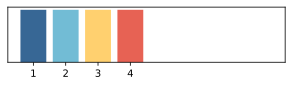

打乱并撕开扑克牌后扑克牌的排序 [4, 1, 2, 3, 4, 1, 2, 3]


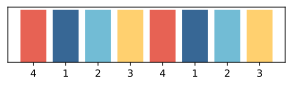

名字字数除以8的余数为1，扑克牌的排序 [1, 2, 3, 4, 1, 2, 3, 4]


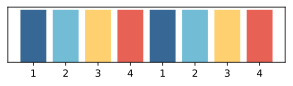

取前三张牌，插入中间任一位置后扑克牌的排序 [4, 1, 2, 3, 1, 2, 3, 4]


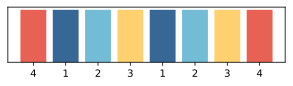

取出第一张牌藏起来后，剩下的扑克牌的排序 [1, 2, 3, 1, 2, 3, 4]


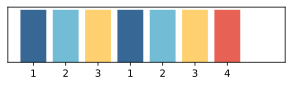

根据南方/北方/未知方人，取出前2张牌, 插入中间任一位置后扑克牌的排序 [3, 1, 2, 3, 1, 2, 4]


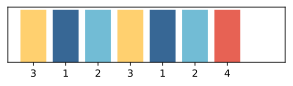

根据男生/女生，扔掉前2张牌后扑克牌的排序 [2, 3, 1, 2, 4]


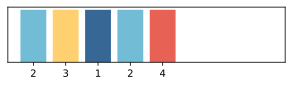

根据“见证奇迹的时刻”7个字重新排序后，扑克牌的排序 [1, 2, 4, 2, 3]


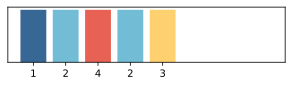

“好运留下来，烦恼丢出去”后，最后剩下的扑克牌 4


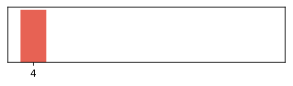

隐藏的神秘牌是 4


In [4]:
# test
original_card = [1, 2, 3, 4]
hidden_card, final_card = magic(original_card)

从可视化中很明显地看到，藏起来的牌的牌和藏牌时序列的最后一张牌一定是一致的，不管中间如何变化，最后一张牌始终在最后一张。而任务6和任务7不存在随机性，因此留到最后的一定是原来的最后一张牌。
 
这不是一个魔术，而是一个有趣的排序问题～